In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name="Full_new")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [4]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [5]:
df.drop('Unnamed: 44',axis=1,inplace=True)
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(), inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [7]:
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'],errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors='coerce')

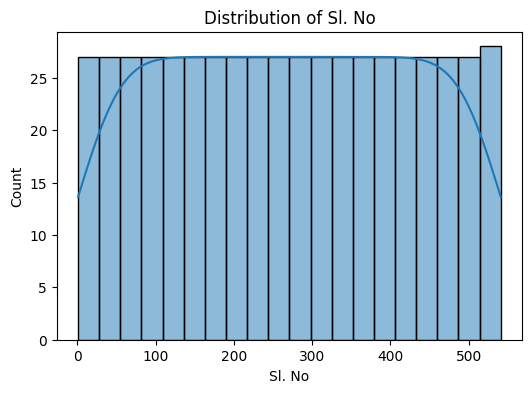

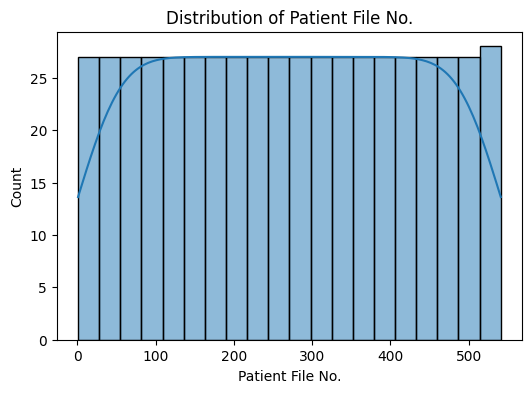

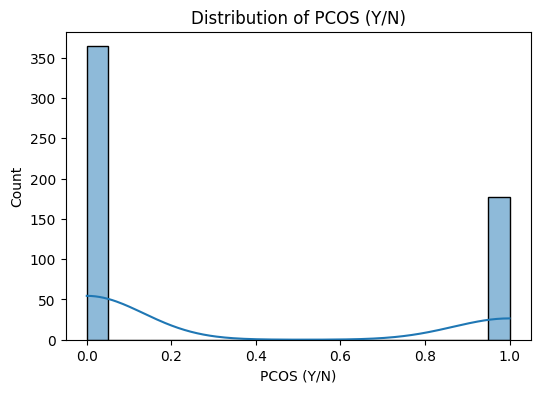

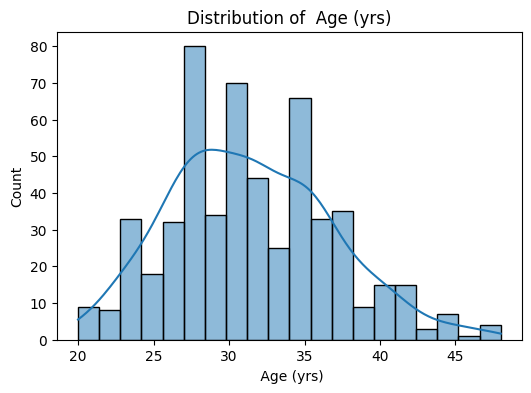

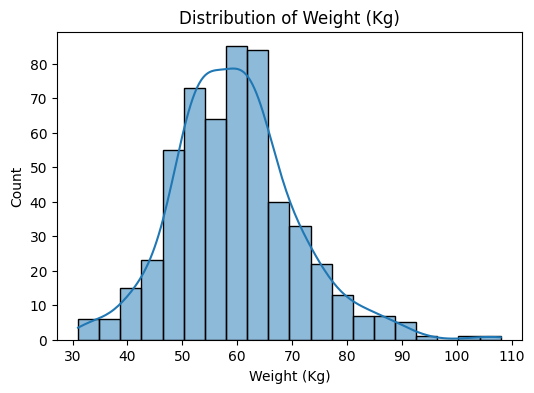

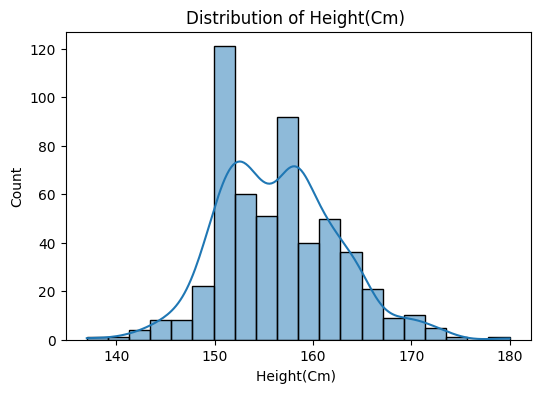

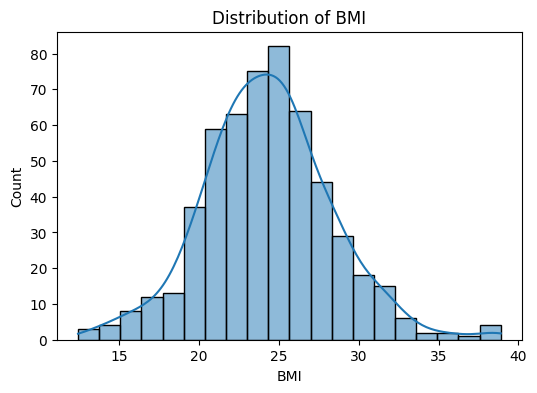

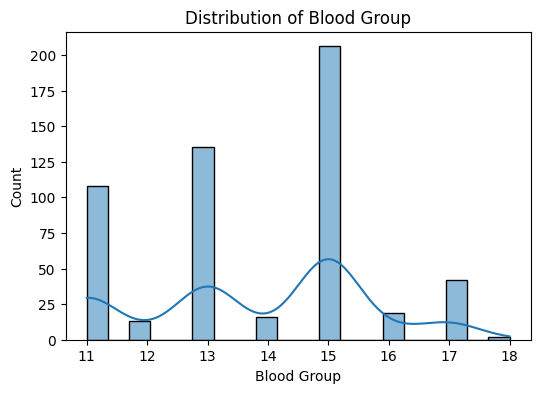

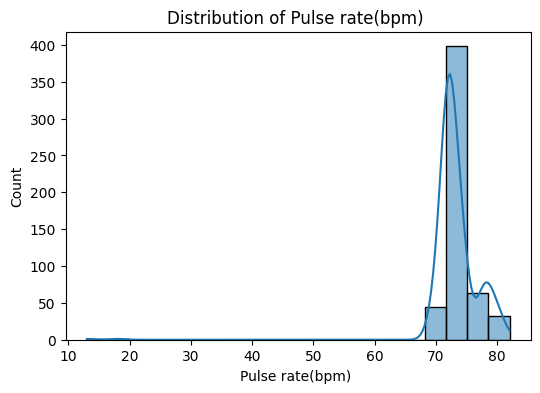

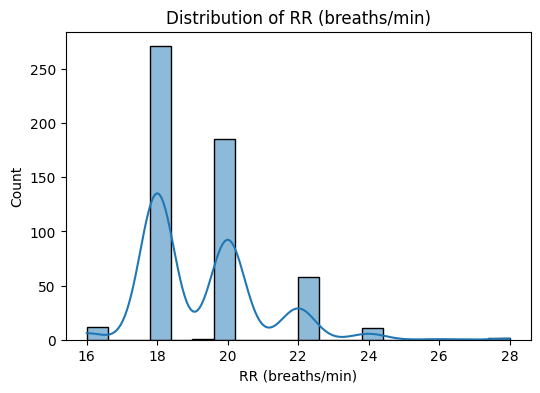

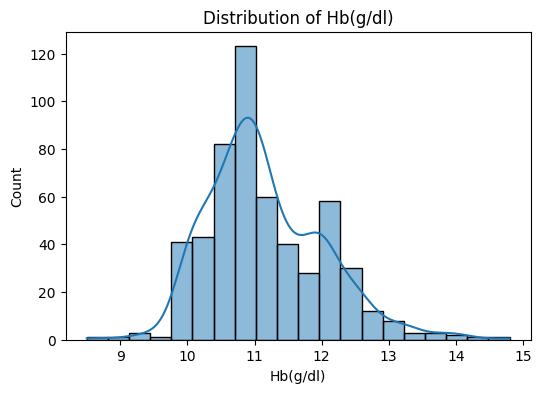

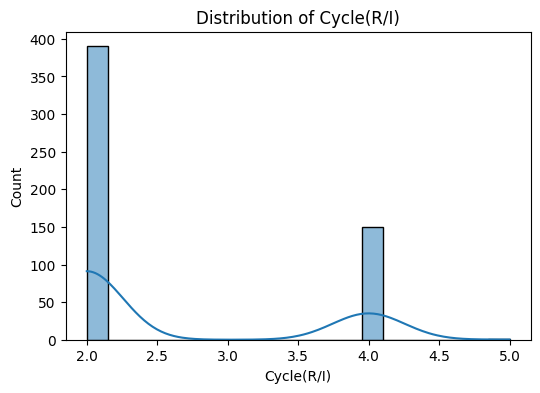

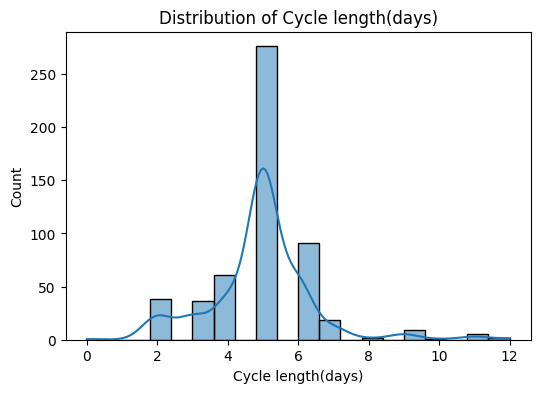

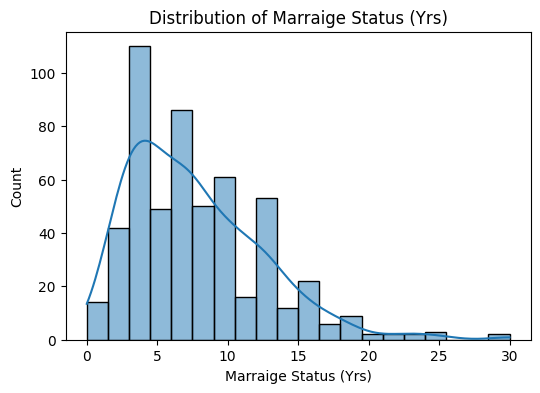

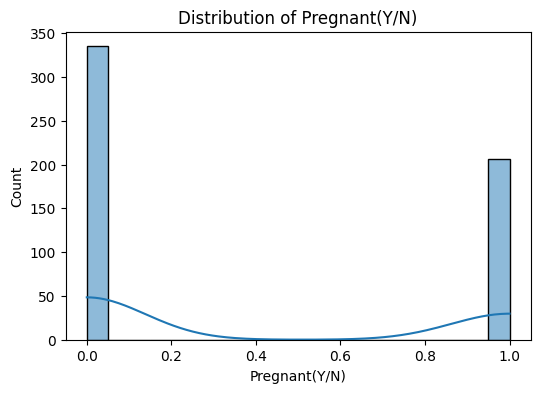

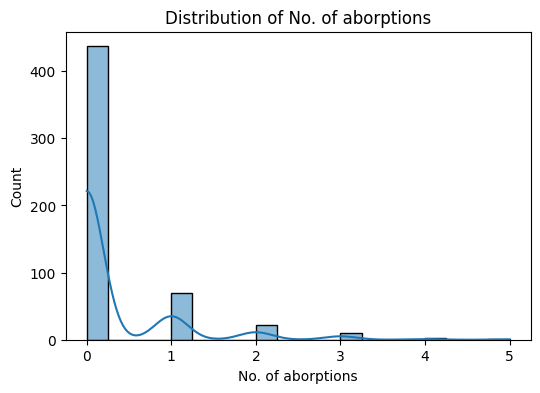

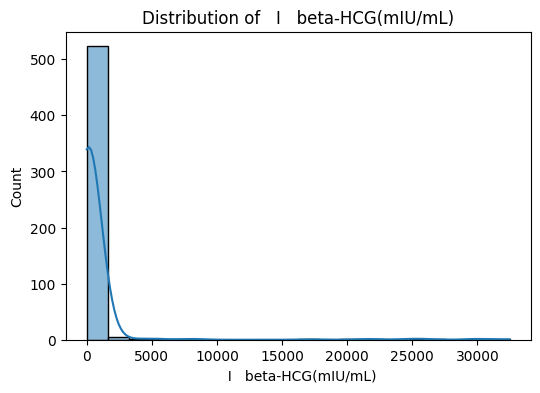

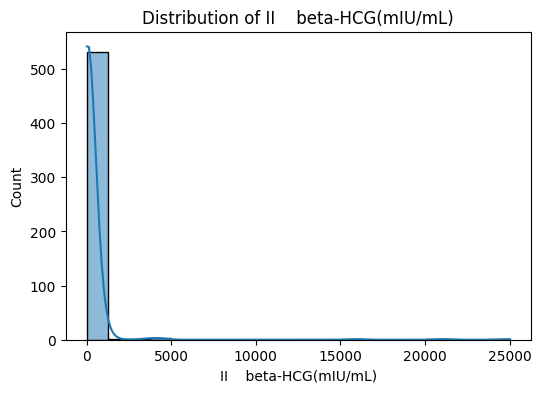

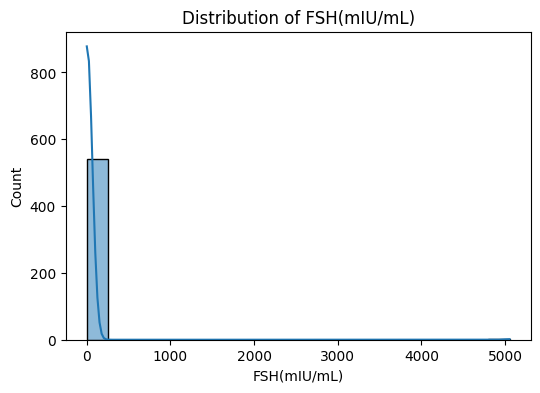

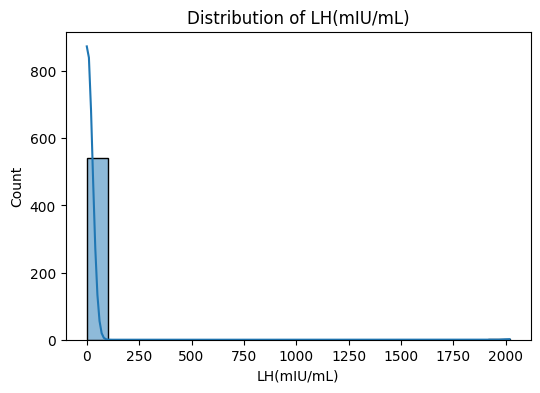

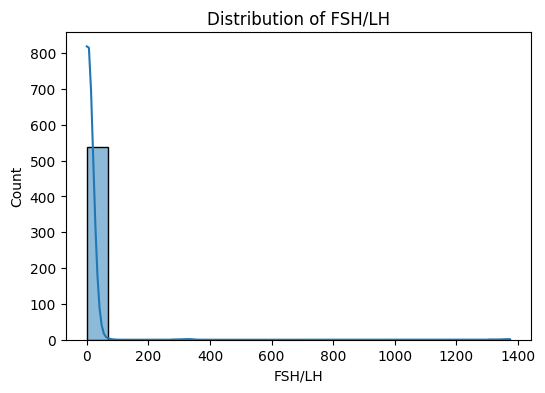

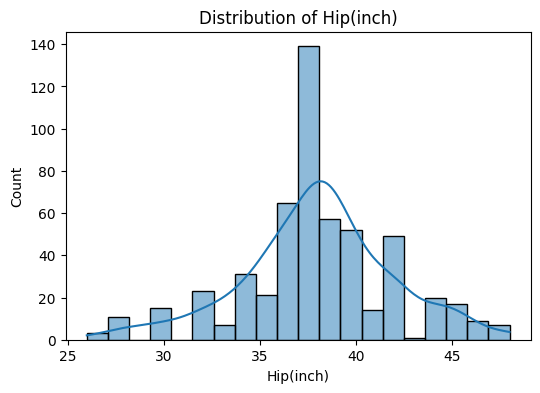

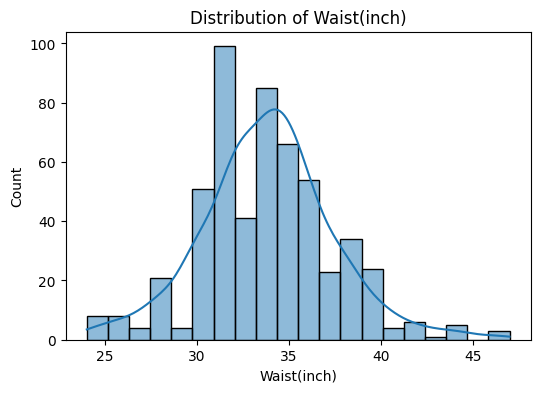

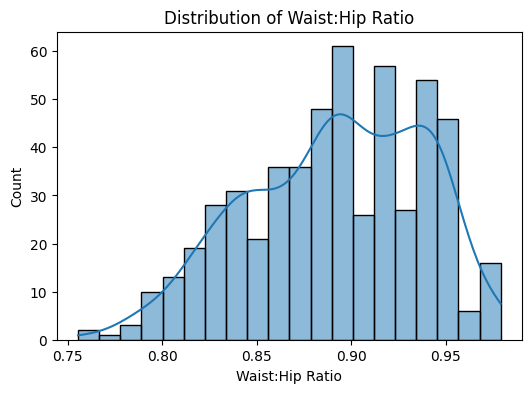

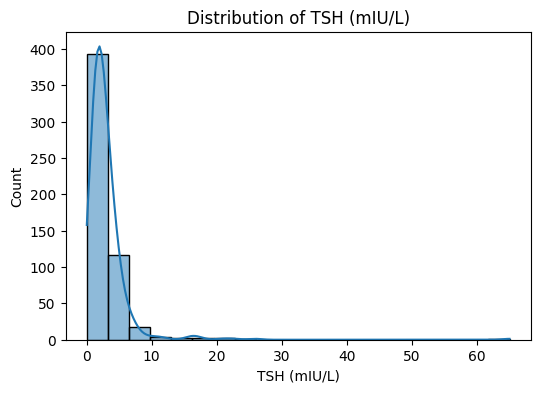

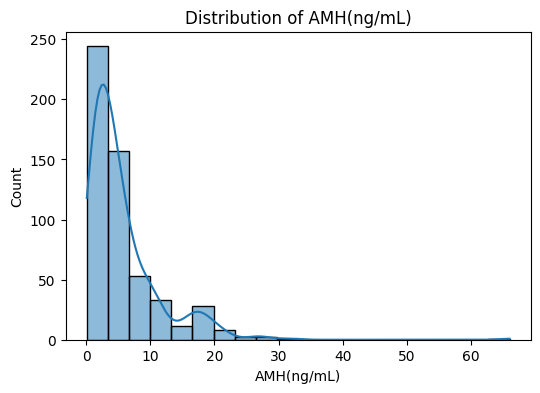

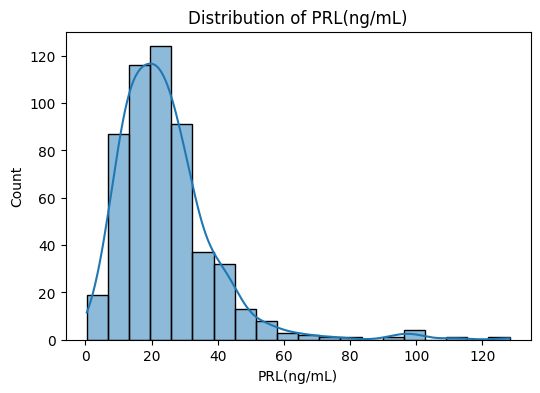

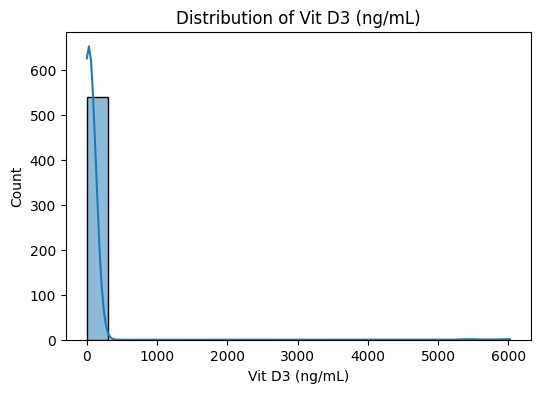

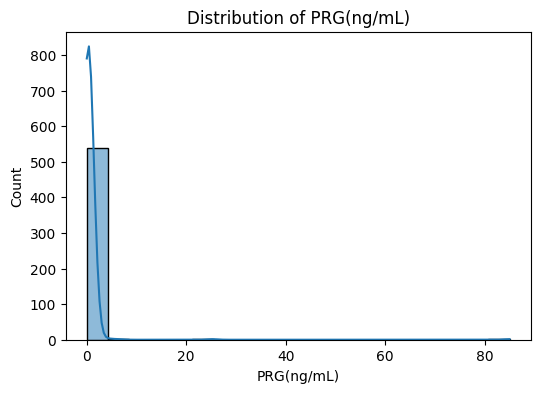

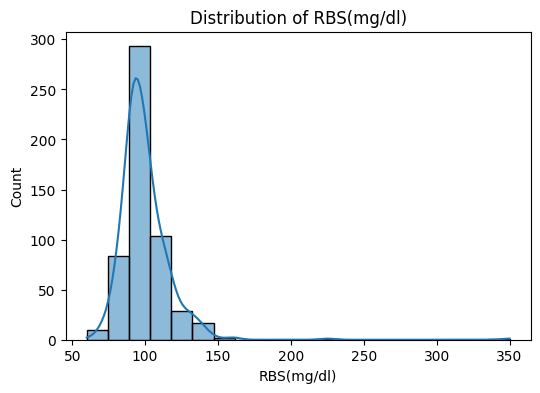

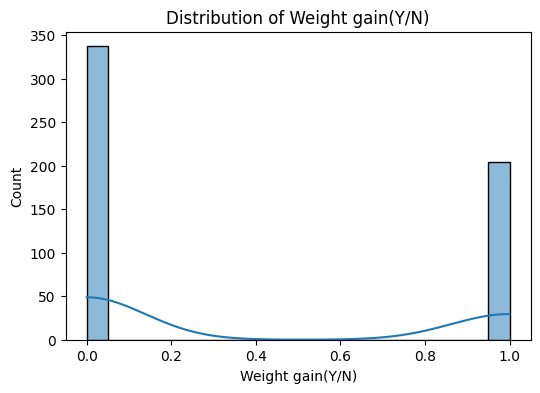

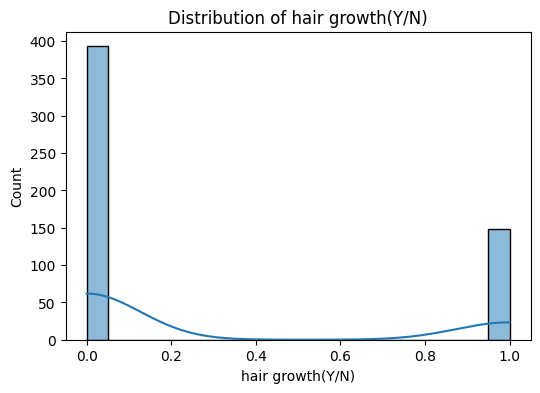

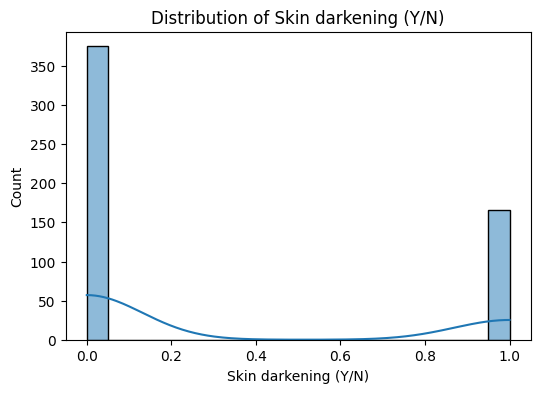

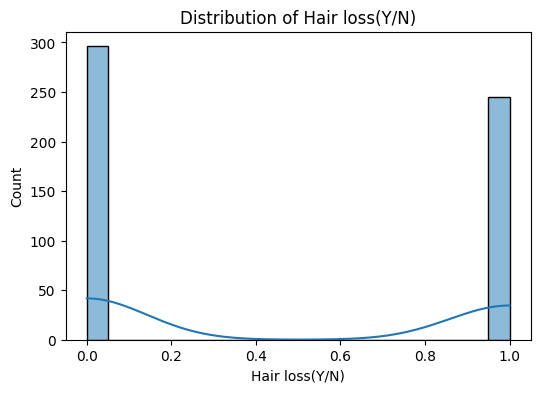

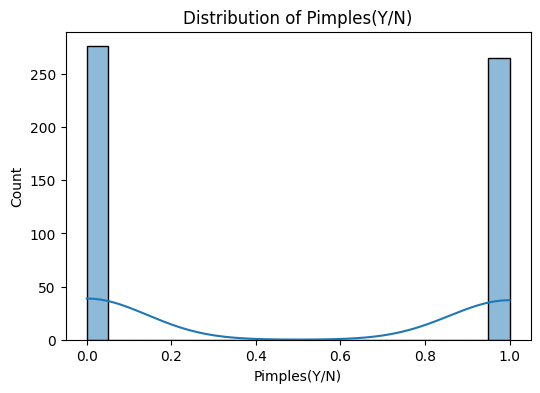

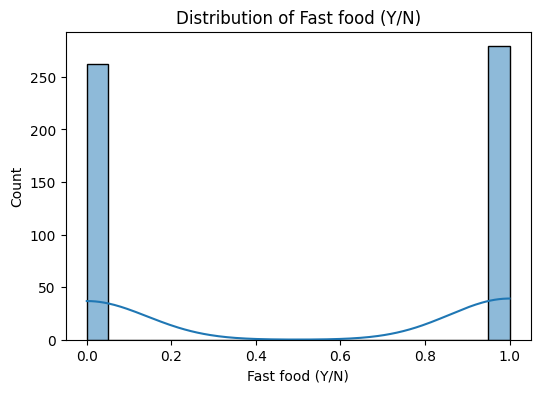

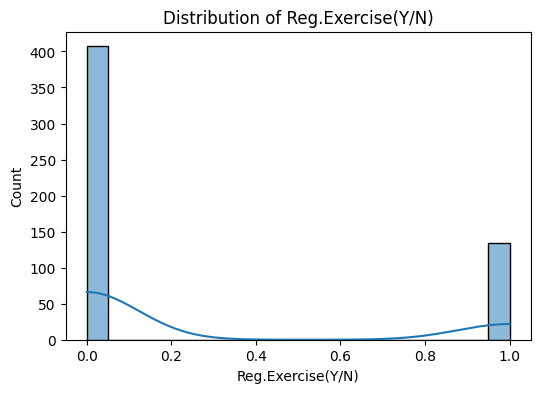

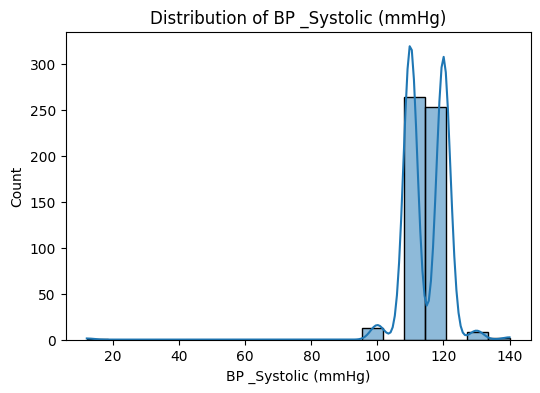

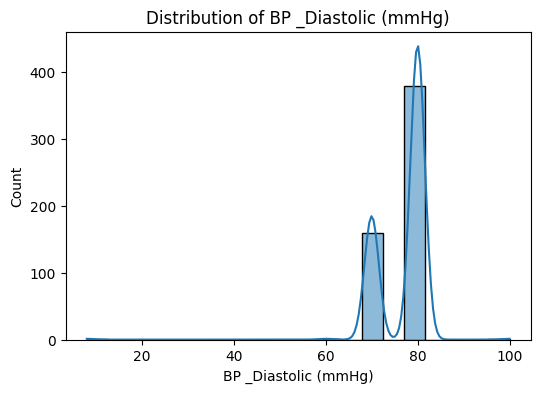

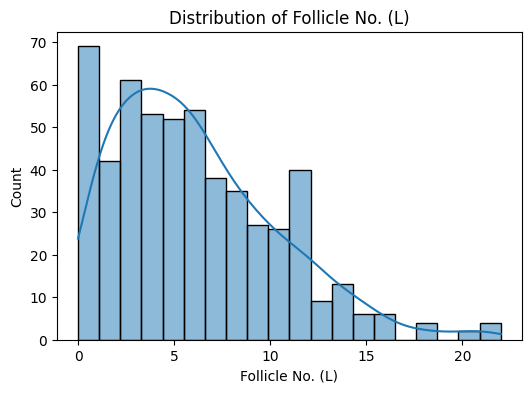

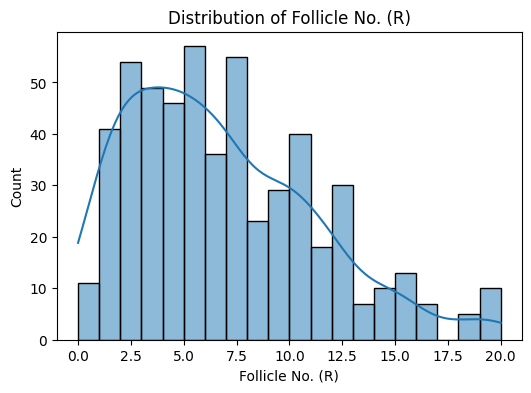

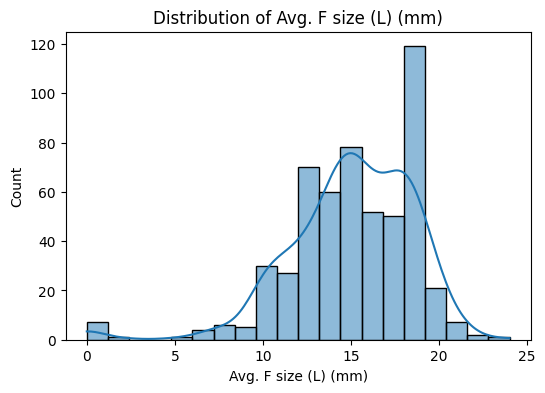

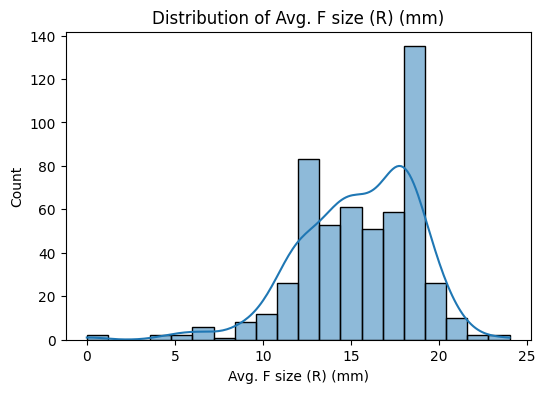

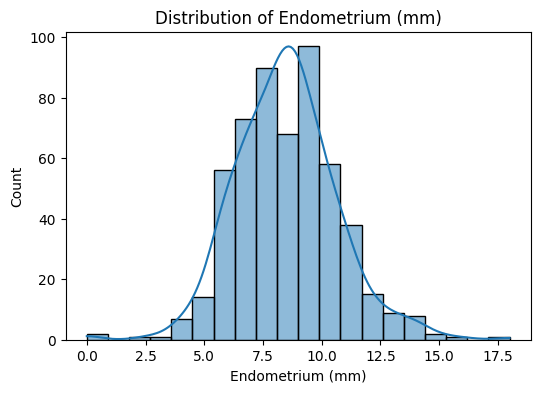

In [8]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

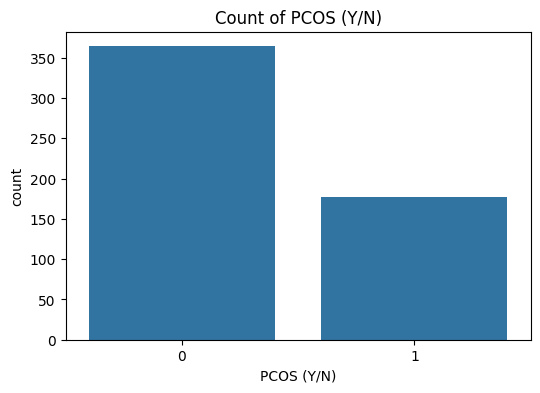

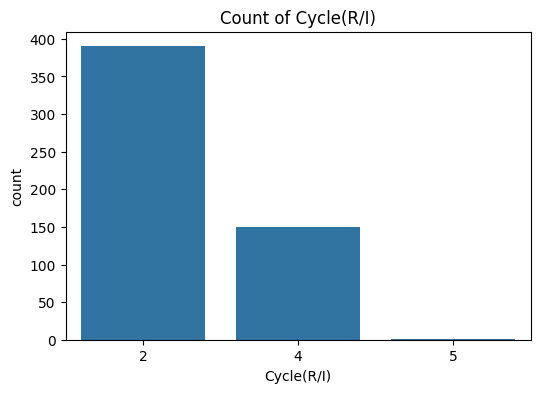

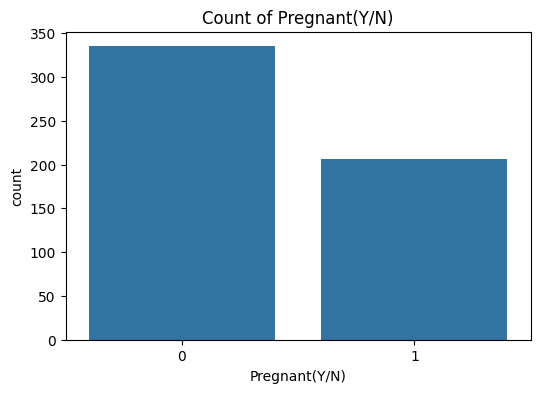

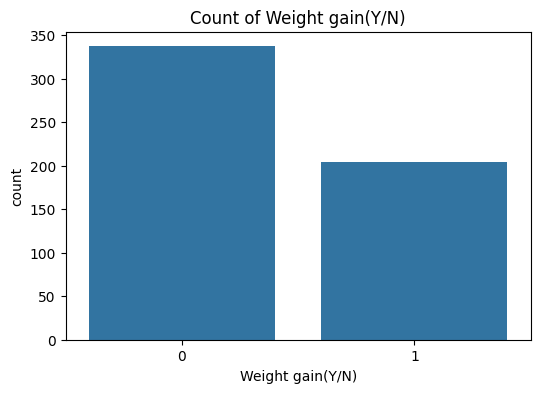

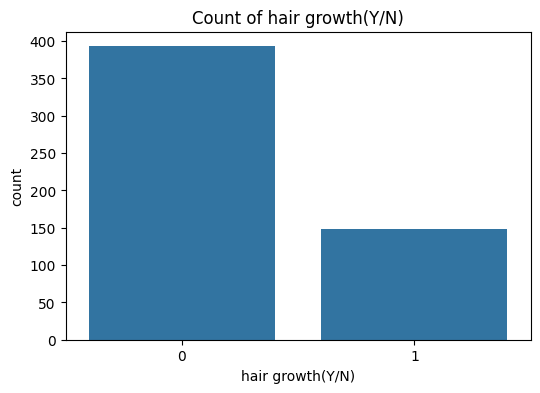

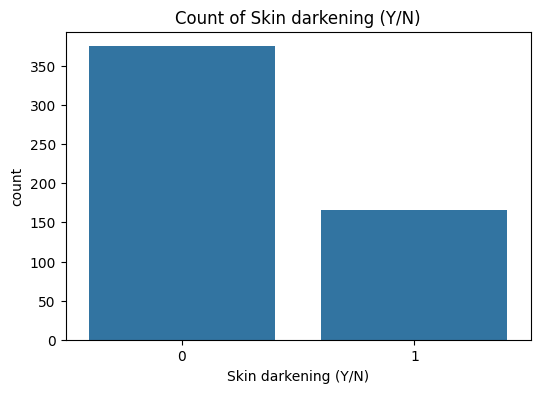

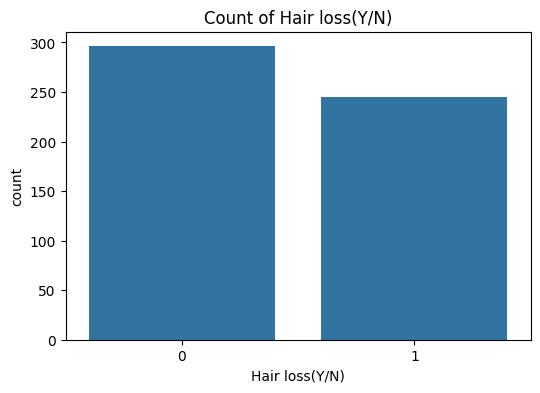

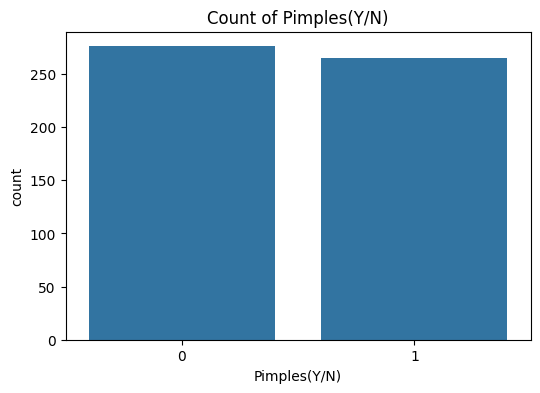

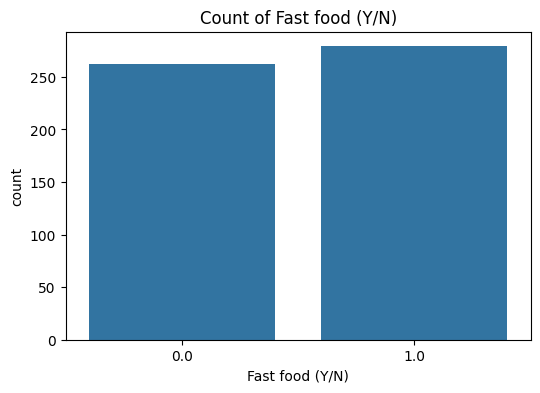

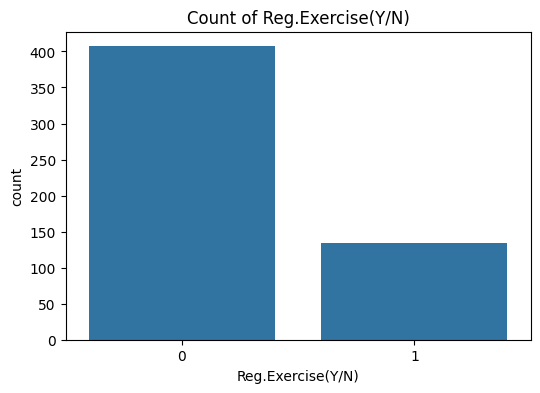

In [9]:
# Convert categorical columns to proper types
categorical_columns = ['PCOS (Y/N)', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 
                       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
                       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
# Categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()

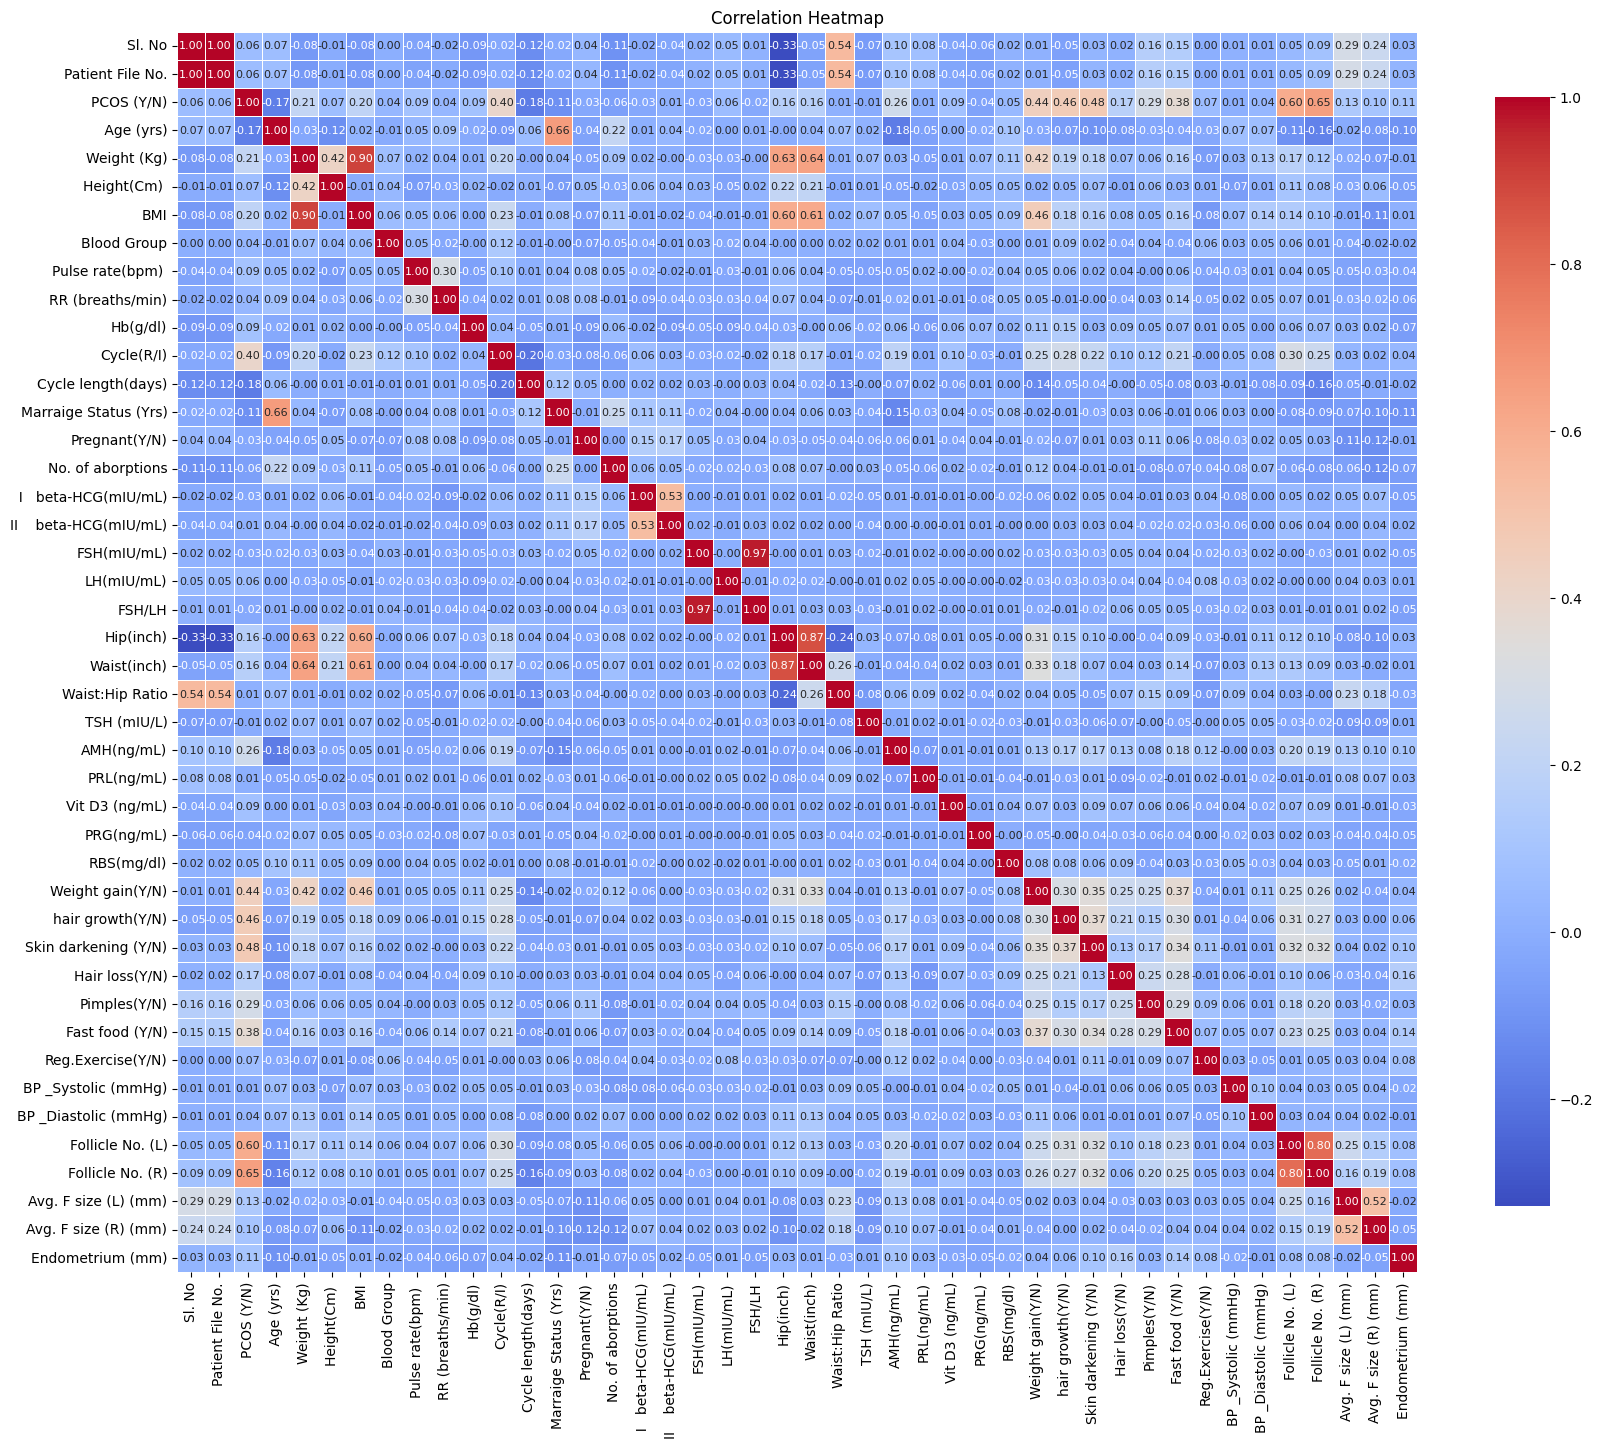

In [10]:
plt.figure(figsize=(20, 18))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8},  # Reduce annotation size
            cbar_kws={"shrink": .8},  # Adjust color bar size
            square=True,  # Make cells square-shaped
            linewidths=0.5)  # Add lines between cells
plt.title("Correlation Heatmap")
plt.show()

In [11]:
correlation_with_target = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Cycle length(days)        0.178480
Hair loss(Y/N)            0.172879
 Age (yrs)                0.168513
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Marraige Status (Yrs)     0.113056
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.    

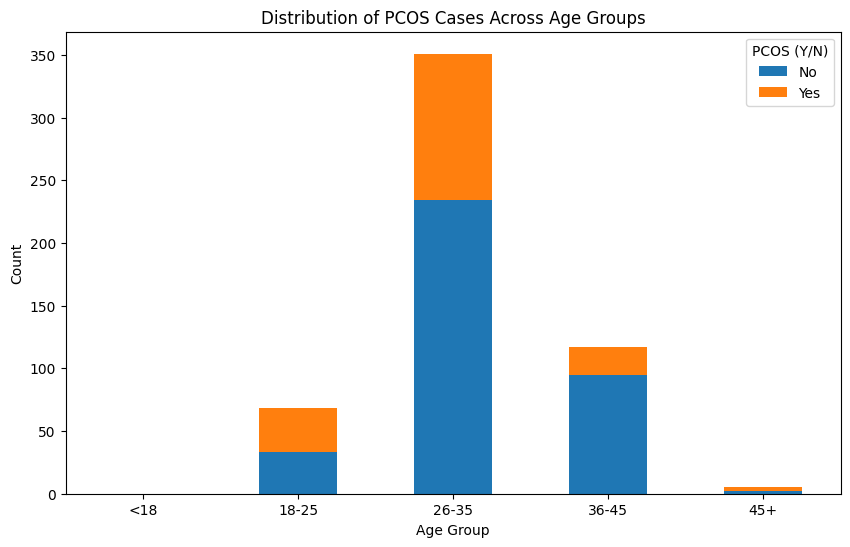

In [12]:
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df[' Age (yrs)'],bins = age_groups,labels = age_labels)
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

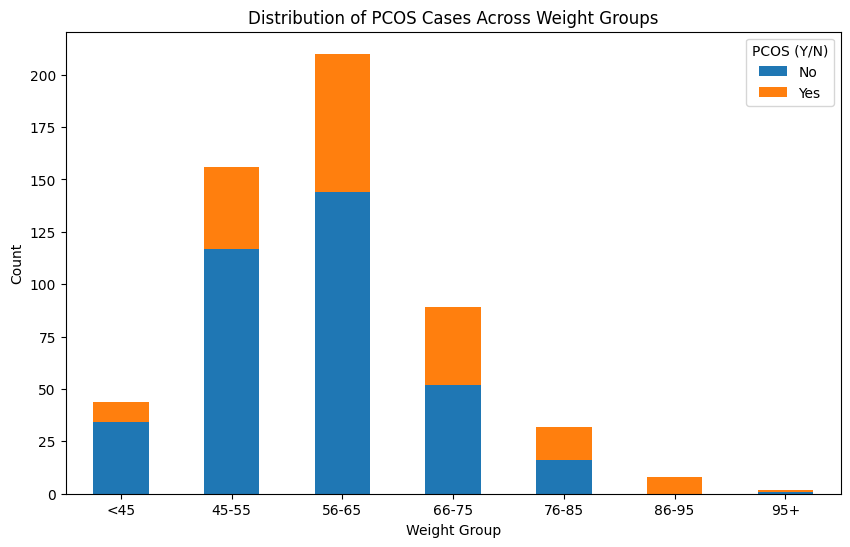

In [13]:
# Define age group bins and labels
weight_groups = [0,45,55,65,75,85,95,float('inf')]
weight_labels = ['<45','45-55','56-65','66-75','76-85','86-95','95+']
df['Weight Group'] = pd.cut(df['Weight (Kg)'],bins = weight_groups,labels = weight_labels)
# Categorize the 'Weight (Kg)' column into weight groups
weight_group_counts = df.groupby(['Weight Group', 'PCOS (Y/N)']).size().unstack()
type(weight_group_counts)
weight_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Weight Groups')
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [14]:
top_10_features = correlation_with_target[0:11]
print(top_10_features)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.263863
Weight (Kg)             0.211938
Name: PCOS (Y/N), dtype: float64


=== Logistic Regression ===
Confusion Matrix:
[[103   6]
 [  9  44]]


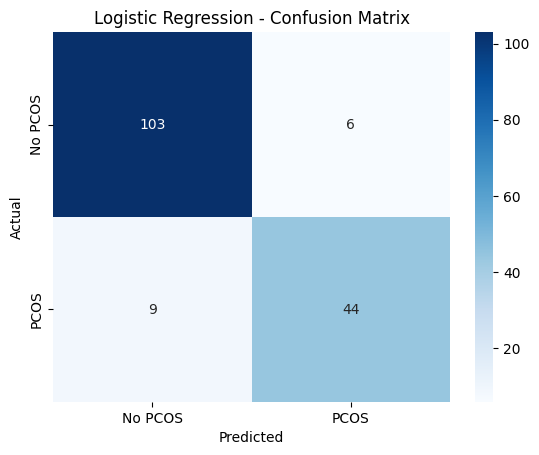


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       109
           1       0.88      0.83      0.85        53

    accuracy                           0.91       162
   macro avg       0.90      0.89      0.89       162
weighted avg       0.91      0.91      0.91       162

Accuracy Score: 0.9074074074074074


=== Random Forest ===
Confusion Matrix:
[[102   7]
 [ 13  40]]


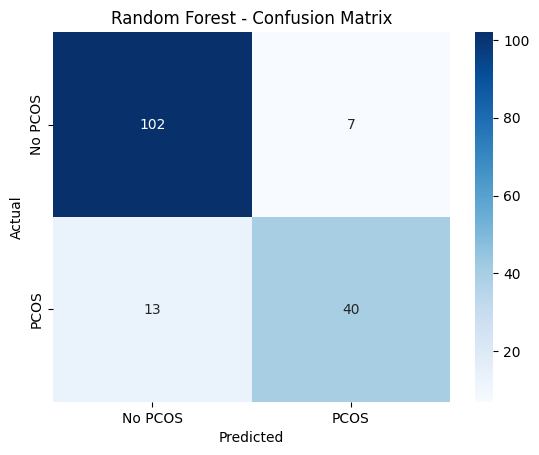


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.85      0.75      0.80        53

    accuracy                           0.88       162
   macro avg       0.87      0.85      0.86       162
weighted avg       0.88      0.88      0.87       162

Accuracy Score: 0.8765432098765432




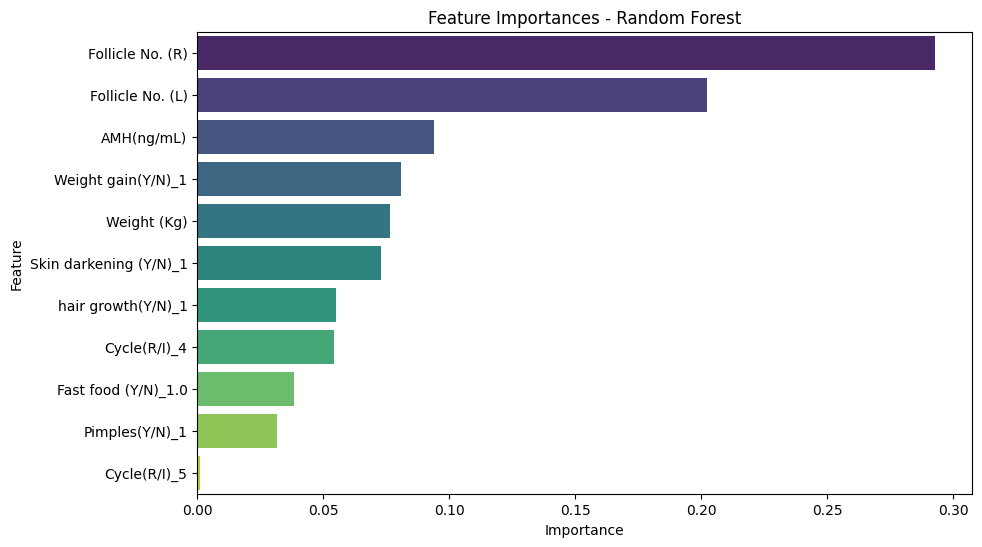

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Selecting top features
features = ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)', 
            'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 
            'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)', 'Weight (Kg)']
target = 'PCOS (Y/N)'

# Ensure columns exist in the dataset
df = df[[target] + features].dropna()

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Convert categorical variables to numeric (if necessary)
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes  # Convert 'PCOS (Y/N)' to binary (0 or 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy Score:", accuracy_score(y_true, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_test, lr_predictions, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, rf_predictions, "Random Forest")

# Feature Importance (for Random Forest)
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [17]:
pip install xgboost lightgbm

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


Tuning Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
Tuning SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Tuning Decision Tree...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Tuning Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters

D:\anaconda_new\envs\pcos_app\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 124, number of negative: 254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328042 -> initscore=-0.717053
[LightGBM] [Info] Start training from score -0.717053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

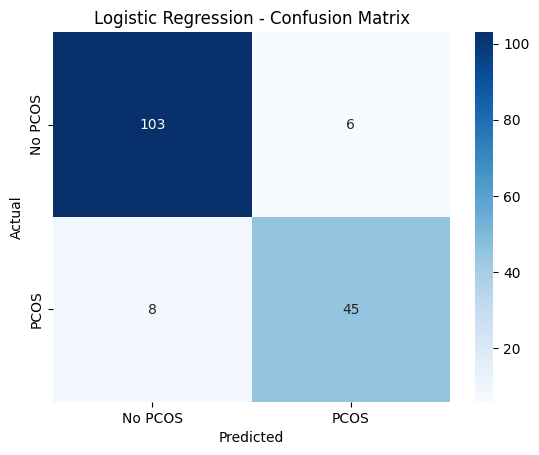


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       109
           1       0.88      0.85      0.87        53

    accuracy                           0.91       162
   macro avg       0.91      0.90      0.90       162
weighted avg       0.91      0.91      0.91       162

Accuracy Score: 0.9135802469135802


=== Random Forest ===
Confusion Matrix:


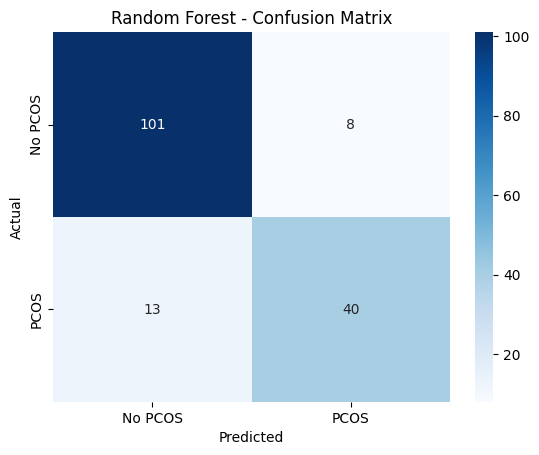


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       109
           1       0.83      0.75      0.79        53

    accuracy                           0.87       162
   macro avg       0.86      0.84      0.85       162
weighted avg       0.87      0.87      0.87       162

Accuracy Score: 0.8703703703703703


=== SVC ===
Confusion Matrix:


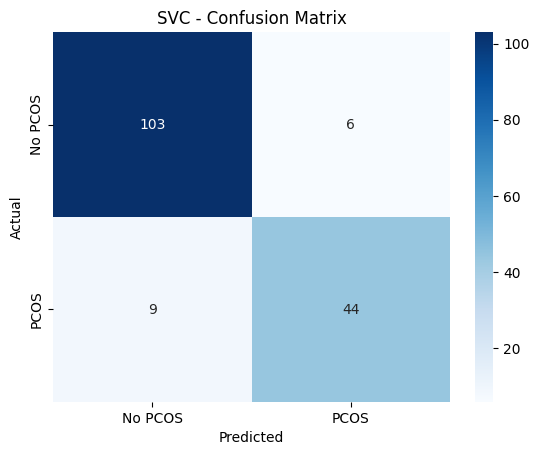


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       109
           1       0.88      0.83      0.85        53

    accuracy                           0.91       162
   macro avg       0.90      0.89      0.89       162
weighted avg       0.91      0.91      0.91       162

Accuracy Score: 0.9074074074074074


=== K-Nearest Neighbors ===
Confusion Matrix:


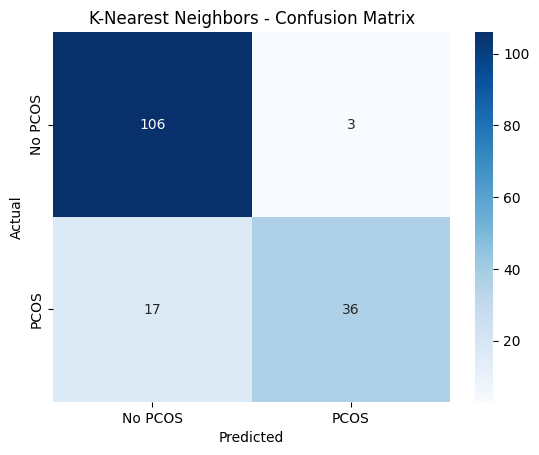


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       109
           1       0.92      0.68      0.78        53

    accuracy                           0.88       162
   macro avg       0.89      0.83      0.85       162
weighted avg       0.88      0.88      0.87       162

Accuracy Score: 0.8765432098765432


=== Decision Tree ===
Confusion Matrix:


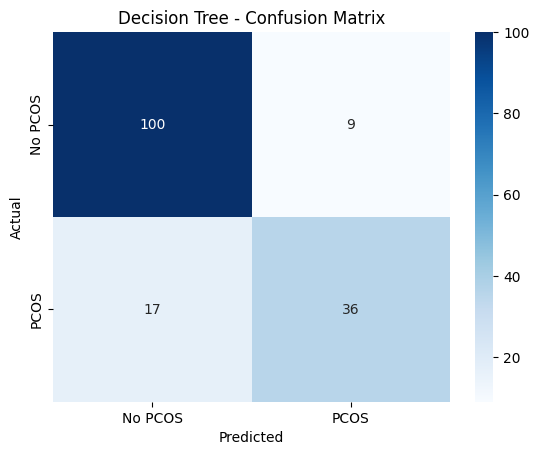


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       109
           1       0.80      0.68      0.73        53

    accuracy                           0.84       162
   macro avg       0.83      0.80      0.81       162
weighted avg       0.84      0.84      0.84       162

Accuracy Score: 0.8395061728395061


=== Gradient Boosting ===
Confusion Matrix:


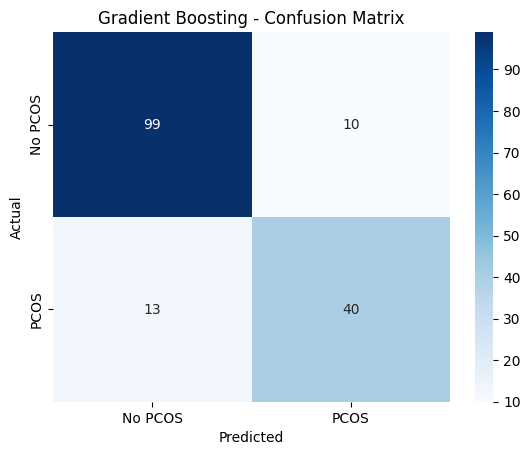


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       109
           1       0.80      0.75      0.78        53

    accuracy                           0.86       162
   macro avg       0.84      0.83      0.84       162
weighted avg       0.86      0.86      0.86       162

Accuracy Score: 0.8580246913580247


=== AdaBoost ===
Confusion Matrix:


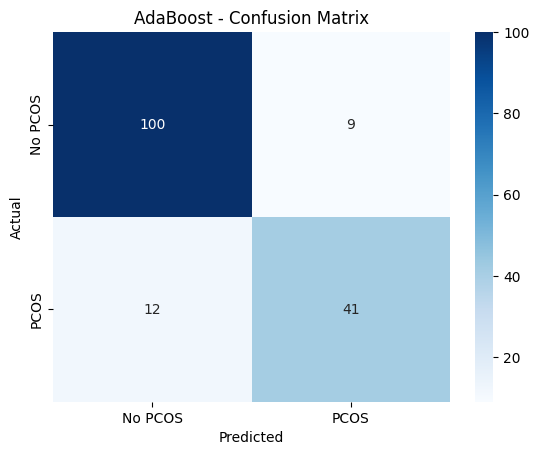


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       109
           1       0.82      0.77      0.80        53

    accuracy                           0.87       162
   macro avg       0.86      0.85      0.85       162
weighted avg       0.87      0.87      0.87       162

Accuracy Score: 0.8703703703703703


=== XGBoost ===
Confusion Matrix:


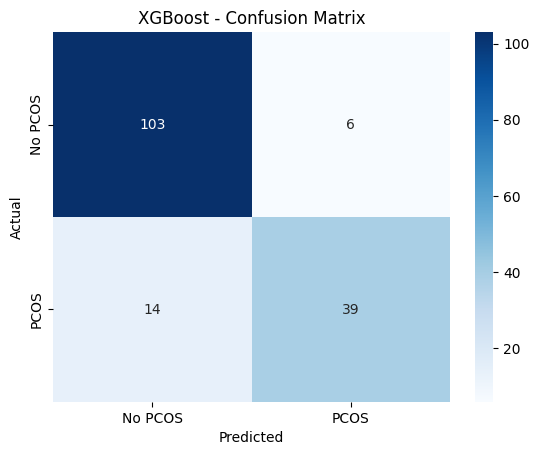


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       109
           1       0.87      0.74      0.80        53

    accuracy                           0.88       162
   macro avg       0.87      0.84      0.85       162
weighted avg       0.88      0.88      0.87       162

Accuracy Score: 0.8765432098765432


=== LightGBM ===
Confusion Matrix:


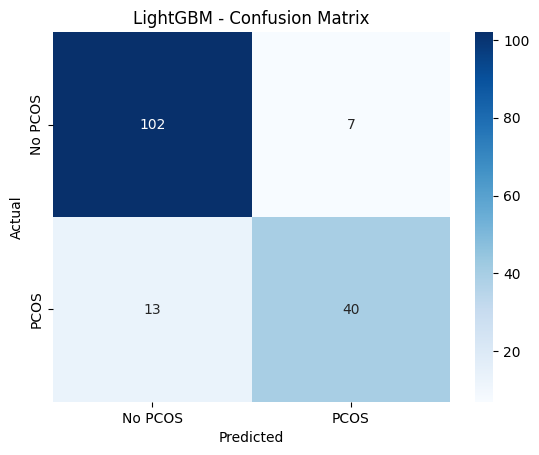


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.85      0.75      0.80        53

    accuracy                           0.88       162
   macro avg       0.87      0.85      0.86       162
weighted avg       0.88      0.88      0.87       162

Accuracy Score: 0.8765432098765432


=== Naive Bayes ===
Confusion Matrix:


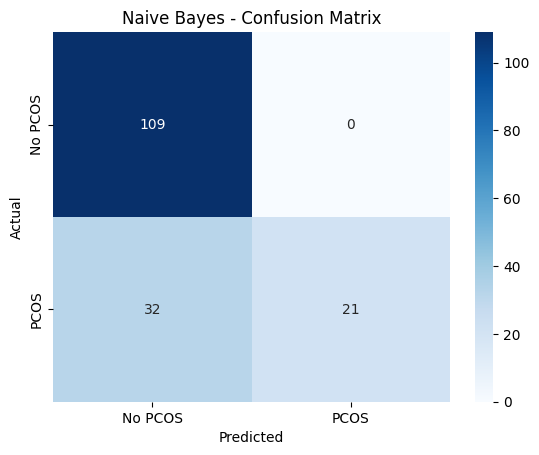


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       109
           1       1.00      0.40      0.57        53

    accuracy                           0.80       162
   macro avg       0.89      0.70      0.72       162
weighted avg       0.85      0.80      0.77       162

Accuracy Score: 0.8024691358024691


Best Hyperparameters:
{'Logistic Regression': {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}, 'Random Forest': {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fractio

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy Score:", accuracy_score(y_true, y_pred))
    print("\n")

# Dataset preparation
features = ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)', 
            'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 
            'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)', 'Weight (Kg)']
target = 'PCOS (Y/N)'

df = df[[target] + features].dropna()

X = df[features]
y = df[target]

# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)
y = y.astype('category').cat.codes  # Convert target to binary (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models and hyperparameters
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=500),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20],
            'criterion': ['gini', 'entropy']
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [-1, 5, 10]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # GaussianNB does not have hyperparameters for tuning.
        }
    }
}

# Store best models and hyperparameters
best_models = {}
for model_name, mp in model_params.items():
    print(f"Tuning {model_name}...")
    if len(mp['params']) > 0:  # Only apply GridSearchCV if there are hyperparameters to tune
        grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        # Directly fit the model for Naive Bayes or others without hyperparameters
        mp['model'].fit(X_train, y_train)
        best_models[model_name] = mp['model']

# Evaluate each model with the best parameters
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, model_name)

# Save the best hyperparameters for all models
best_hyperparameters = {model_name: model.get_params() for model_name, model in best_models.items()}
print("Best Hyperparameters:")
print(best_hyperparameters)


In [20]:
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model
model = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=42)

# Perform k-fold cross-validation (e.g., k=10)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())
# Split the data into training and testing sets (if not done already)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the logistic regression model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.92592593 0.96296296 0.94444444 0.90740741 0.83333333 0.83333333
 0.96296296 0.94444444 0.7962963  0.90740741]
Mean Accuracy: 0.9018518518518519
Standard Deviation of Accuracy: 0.05680689500065912
Confusion Matrix:
[[102   7]
 [  9  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       109
           1       0.86      0.83      0.85        53

    accuracy                           0.90       162
   macro avg       0.89      0.88      0.89       162
weighted avg       0.90      0.90      0.90       162

Accuracy Score: 0.9012345679012346


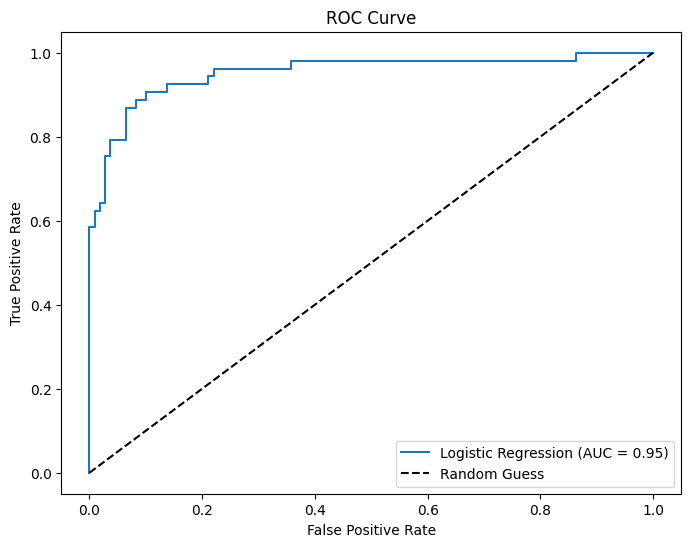

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [22]:
import joblib

joblib.dump(model, 'logistic_regression_pcos_model.pkl')



['logistic_regression_pcos_model.pkl']

In [23]:
import pickle
# Save both model and scaler
model_filename = 'logistic_regression_pcos_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump({'model': model, 'scaler': scaler}, file)

print(f"Model and scaler saved as {model_filename}")


Model and scaler saved as logistic_regression_pcos_model.pkl


In [25]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Validate required columns
required_columns = ['pcos (y/n)', 'follicle no. (r)', 'follicle no. (l)',
                    'skin darkening (y/n)', 'hair growth(y/n)', 'weight gain(y/n)',
                    'cycle(r/i)', 'fast food (y/n)', 'pimples(y/n)',
                    'amh(ng/ml)', 'weight (kg)']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {missing_columns}")

# Define features and target
categorical_features = ['skin darkening (y/n)', 'hair growth(y/n)', 'weight gain(y/n)',
                        'cycle(r/i)', 'fast food (y/n)', 'pimples(y/n)']
numerical_features = ['follicle no. (r)', 'follicle no. (l)', 'amh(ng/ml)', 'weight (kg)']
target = 'pcos (y/n)'

X = df[categorical_features + numerical_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import OneHotEncoder

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)


# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Save the model and preprocessor
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import pickle

# Assuming df is your training dataframe

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Validate required columns
required_columns = ['pcos (y/n)', 'follicle no. (r)', 'follicle no. (l)',
                    'skin darkening (y/n)', 'hair growth(y/n)', 'weight gain(y/n)',
                    'cycle(r/i)', 'fast food (y/n)', 'pimples(y/n)',
                    'amh(ng/ml)', 'weight (kg)']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {missing_columns}")

# Define features and target
categorical_features = ['skin darkening (y/n)', 'hair growth(y/n)', 'weight gain(y/n)',
                        'fast food (y/n)', 'pimples(y/n)']  # 'cycle(r/i)' is no longer categorical
numerical_features = ['follicle no. (r)', 'follicle no. (l)', 'amh(ng/ml)', 'weight (kg)', 'cycle(r/i)']
target = 'pcos (y/n)'

X = df[categorical_features + numerical_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

# Model pipeline with specific hyperparameters
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.1, penalty='l2', solver='liblinear'))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Show classification metrics
print("Model Prediction Metrics:")
print(classification_report(y_test, y_pred))

# Save the model and preprocessor with a new name
with open("pcos_model_v2.pkl", "wb") as f:
    pickle.dump(model, f)


Model Prediction Metrics:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        75
           1       0.89      0.76      0.82        33

    accuracy                           0.90       108
   macro avg       0.90      0.86      0.87       108
weighted avg       0.90      0.90      0.90       108

